In [1]:
import icecube
from icecube import dataclasses, dataio, icetray, simclasses, recclasses
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
filename = "Selected_bkg_candidates_10files.i3.gz"
infile = dataio.I3File(filename, "r")

In [3]:
i3list = []

i = 0
while infile.more():
    if i % 1000 == 0:
        print("---", i, "---")
    frame = infile.pop_daq()
    
    tree = frame["SignalI3MCTree"]
    primary = tree.get_head()
    children = tree.children(primary)
    j = 0
    for c in children:
        if c.type == 13 or c.type == -13:
            j += 1
            interactions = tree.children(c)
            if len(interactions) > 0:
                interfinal = interactions[-1]
            
            if interfinal.energy > 1:
                i3list.append(interfinal)
#    print(f"number of muons: {j}")
            
        
#    print("--------")
#    for p in frame["MMCTrackList"]: # contains only propagated events
#        print(p)
    i += 1

--- 0 ---
--- 1000 ---
--- 2000 ---
--- 3000 ---
--- 4000 ---
--- 5000 ---
--- 6000 ---
--- 7000 ---
--- 8000 ---
--- 9000 ---
--- 10000 ---
--- 11000 ---
--- 12000 ---
--- 13000 ---
--- 14000 ---


In [4]:
energylist = []
for i in i3list:
    energylist.append(i.energy)

Text(0, 0.5, 'Count')

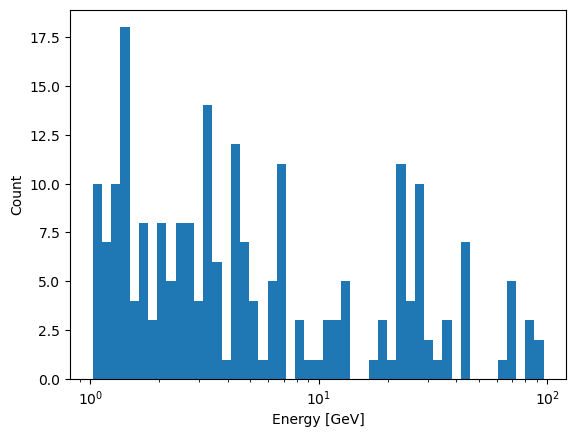

In [5]:
plt.hist(energylist, bins=np.logspace(np.log10(min(energylist)), np.log10(max(energylist))))
plt.xscale("log")
plt.xlabel("Energy [GeV]")
plt.ylabel("Count")